In [27]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
#import data 
mydata =  pd.read_csv('Data for Eightpoint BIA Case Study.csv')

In [3]:
#have a glance at table
mydata.head()

,date,userclass,vertical,affiliate,browser,clicks,age,rpc,installs,revenue,UCWeek,UCMonth,UCYear,source
0,2017/10/25,2017/10/25,maps_1,appfocus1,Chrome,13,0,0.4436,37,5.7668,43,10,2017,googlepartner
1,2017/10/25,2017/10/25,maps_1,appfocus1,Chrome,1140,0,0.4436,2914,505.7040,43,10,2017,search
2,2017/10/25,2017/10/25,maps,appfocus84,Chrome,2189,0,0.4436,7543,971.0404,43,10,2017,NaN
3,2017/10/25,2017/10/25,maps_1,appfocus1,Firefox,1,0,0.4436,6,0.4436,43,10,2017,googlepartner
4,2017/10/25,2017/10/25,maps_1,appfocus1,Firefox,123,0,0.4436,170,54.5628,43,10,2017,search


In [5]:
# Q1
data=mydata[mydata['UCMonth']==10]
df=data.groupby(['affiliate'])['revenue','installs'].agg('sum')

In [ ]:
#Q1

In [6]:
df['RPI']=df.revenue/df.installs

In [7]:
df

,revenue,installs,RPI
affiliate,,,
appfocus1,53603.0929,809580,0.066211
appfocus84,174478.7615,2768181,0.063030


In [8]:
trace0 = go.Bar(
    x=['appfocus1', 'appfocus84'],
    y=[0.066211, 0.063030],
    marker=dict(
        color=['rgba(222,45,38,0.8)','rgba(204,204,204,1)']),
)

data = [trace0]
layout = go.Layout(
    title='RPI',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar1111')

In [9]:
#Q2

In [10]:
data=mydata
data_1=data[data.affiliate=='appfocus1']
data_84=data[data.affiliate=='appfocus84']
# df=data.groupby(['affiliate','age'])['revenue','installs'].agg('sum')

In [11]:
df1=data_1.groupby(['age'])['revenue','installs'].agg('sum')
df1['RPI']=df1.revenue/df1.installs

df84=data_84.groupby(['age'])['revenue','installs'].agg('sum')
df84['RPI']=df84.revenue/df84.installs

In [12]:
trace0 = go.Bar(
    x=df1.index,
    y=df1.RPI,
    name='appfocus1',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=df84.index,
    y=df84.RPI,
    name='appfocus84',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar2222222')

In [13]:
#Use moving average method to estimate the RPI at age(80-120)

# df1
MovingAverage = df1.rolling(window=20).mean()
MovingAverage.RPI.tail()

# 0.023433 is the estimated RPI

age
81    0.022490
82    0.022544
83    0.022772
84    0.023124
85    0.023433
Name: RPI, dtype: float64

In [14]:
# df84
MovingAverage = df84.rolling(window=20).mean()
MovingAverage.RPI.tail()
# 0.009710 is the estimated RPI

age
81    0.009478
82    0.009489
83    0.009539
84    0.009629
85    0.009710
Name: RPI, dtype: float64

In [15]:
# LTV for appfocus1 is 
df1.RPI.sum()+0.023433*(120-85)

3.727822839199746

In [16]:
# LTV for appfocus84 is 
df84.RPI.sum()+0.009710*(120-85)

1.8606146938493258

In [35]:
#Q3


data_3=mydata[mydata.affiliate=='appfocus84']
df_3=data_3.groupby(['UCMonth'])['revenue','installs'].agg('sum')
df_3['RPI']=df_3.revenue/df_3.installs

In [36]:
df_3

,revenue,installs,RPI
UCMonth,,,
8,270036.1181,18349595,0.014716
9,300290.9465,11063397,0.027143
10,174478.7615,2768181,0.063030


In [37]:
trace10 = go.Bar(
    x=['8', '9','10'],
    y=[0.014716, 0.027143,0.063030],
    marker=dict(
        color=['rgba(222,45,38,0.8)','rgba(222,45,38,0.8)','rgba(222,45,38,0.8)']),
)

data = [trace10]
layout = go.Layout(
    title='RPI for appfocus84',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar3333333')

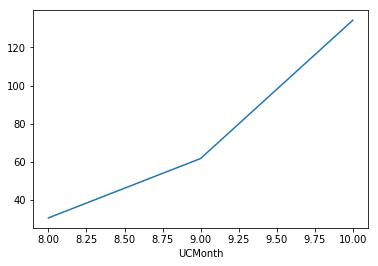

In [38]:
data_3.groupby(['UCMonth'])['revenue'].mean().plot()

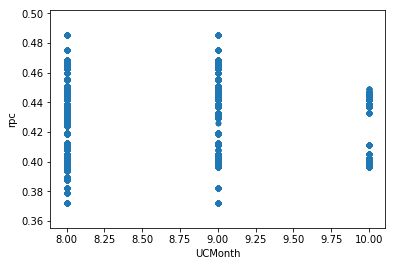

In [39]:
data_3.plot.scatter(x='UCMonth',y='rpc')

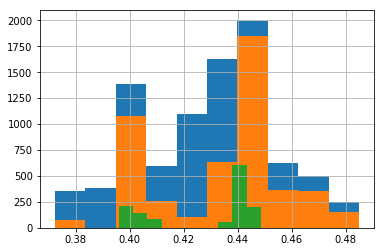

In [40]:
data_3[data_3.UCMonth==8].rpc.hist()
data_3[data_3.UCMonth==9].rpc.hist()
data_3[data_3.UCMonth==10].rpc.hist()

In [246]:
# as we can see, the factor that affects the change in RPI is the avg click time per month(RPC) , which will also decay with time.
# and RPC will coverage to 0.40 and 0.44 over time. based on the given data, the potential effect that results in different RPC is from the browser.
# but we still need more information to discover this

In [ ]:
# Q5

In [41]:
data_5=mydata[mydata.affiliate=='appfocus1']
data_5=data_5[data_5.UCMonth==10]

df_googler=data_5[data_5.source=='googlepartner']
df_search=data_5[data_5.source=='search']

In [42]:
df11=df_googler.groupby(['age'])['revenue','installs'].agg('sum')
df11['RPI']=df11.revenue/df11.installs

df848=df_search.groupby(['age'])['revenue','installs'].agg('sum')
df848['RPI']=df848.revenue/df848.installs

trace12 = go.Bar(
    x=df11.index,
    y=df11.RPI,
    name='googlepartner',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace13 = go.Bar(
    x=df848.index,
    y=df848.RPI,
    name='search',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace12, trace13]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar444444')

In [ ]:
# source 'Search' has a better time decay 